In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
spearman_with_ll_df = pd.read_csv('spearman_df_with_ll.csv')
zero_shot_df = pd.read_csv('zero_shot_fitness_spearman_by_dms_epoch.csv')

In [4]:
spearman_with_ll_df.head()

,DMS ID,Site-Independent,EVmutation,DeepSequence (single),DeepSequence (ensemble),EVE (single),EVE (ensemble),Unirep,Unirep evotuned,MSA Transformer (single),...,Selection Type,UniProt ID,MSA_Neff_L_category,Taxon,ESM2 (15B) Log Likelihood,ESM2 (3B) Log Likelihood,ESM2 (650M) Log Likelihood,ESM2 (150M) Log Likelihood,ESM2 (35M) Log Likelihood,ESM2 (8M) Log Likelihood
0,A0A140D2T1_ZIKV_Sourisseau_2019,0.383,0.354,0.131,0.103,0.394,0.405,-0.133,0.062,0.475,...,OrganismalFitness,A0A140D2T1_ZIKV,Medium,Virus,-1.4080,-1.479018,-1.952964,-2.168351,-2.260805,-2.060821
1,A0A192B1T2_9HIV1_Haddox_2018,0.481,0.407,0.413,0.432,0.509,0.516,0.000,0.513,0.514,...,OrganismalFitness,A0A192B1T2_9HIV1,Medium,Virus,-1.6620,-1.699627,-1.864374,-1.818576,-1.830188,-1.893501
2,A0A1I9GEU1_NEIME_Kennouche_2019,-0.011,0.044,0.107,0.098,0.053,0.054,-0.024,0.084,0.094,...,Activity,A0A1I9GEU1_NEIME,Medium,Prokaryote,-1.1840,-1.387086,-1.185322,-1.381840,-1.565267,-1.622645
3,A0A247D711_LISMN_Stadelmann_2021,0.436,0.459,0.109,0.041,0.428,0.428,0.003,0.026,0.345,...,Activity,A0A247D711_LISMN,High,Eukaryote,-1.4210,-1.415575,-1.411188,-1.335261,-1.437162,-1.377371
4,A0A2Z5U3Z0_9INFA_Doud_2016,0.478,0.473,0.484,0.517,0.545,0.548,0.009,0.492,0.164,...,OrganismalFitness,A0A2Z5U3Z0_9INFA,Medium,Virus,-0.3782,-0.463995,-0.601489,-1.953424,-1.908339,-1.991275


In [5]:
zero_shot_df.head()

,dms,epoch,avg_zero_shot_fitness_spearman
0,A0A140D2T1_ZIKV_Sourisseau_2019,-1,0.215989
1,A0A140D2T1_ZIKV_Sourisseau_2019,0,0.217825
2,A0A140D2T1_ZIKV_Sourisseau_2019,1,0.225999
3,A0A140D2T1_ZIKV_Sourisseau_2019,2,0.238962
4,A0A140D2T1_ZIKV_Sourisseau_2019,3,0.242050


In [6]:
# join the zero shot fitness with the spearman correlation using column 'dms' and 'DMS ID' and only
# add the 'ESM2 (650M) Log Likelihood' 
zero_shot_df = zero_shot_df.merge(spearman_with_ll_df[['DMS ID', 'ESM2 (650M) Log Likelihood']], left_on='dms', right_on='DMS ID')

In [7]:
zero_shot_df.head()

,dms,epoch,avg_zero_shot_fitness_spearman,DMS ID,ESM2 (650M) Log Likelihood
0,A0A140D2T1_ZIKV_Sourisseau_2019,-1,0.215989,A0A140D2T1_ZIKV_Sourisseau_2019,-1.952964
1,A0A140D2T1_ZIKV_Sourisseau_2019,0,0.217825,A0A140D2T1_ZIKV_Sourisseau_2019,-1.952964
2,A0A140D2T1_ZIKV_Sourisseau_2019,1,0.225999,A0A140D2T1_ZIKV_Sourisseau_2019,-1.952964
3,A0A140D2T1_ZIKV_Sourisseau_2019,2,0.238962,A0A140D2T1_ZIKV_Sourisseau_2019,-1.952964
4,A0A140D2T1_ZIKV_Sourisseau_2019,3,0.242050,A0A140D2T1_ZIKV_Sourisseau_2019,-1.952964


Text(0.5, 1.0, 'Zero Shot Fitness vs. Spearman Correlation')

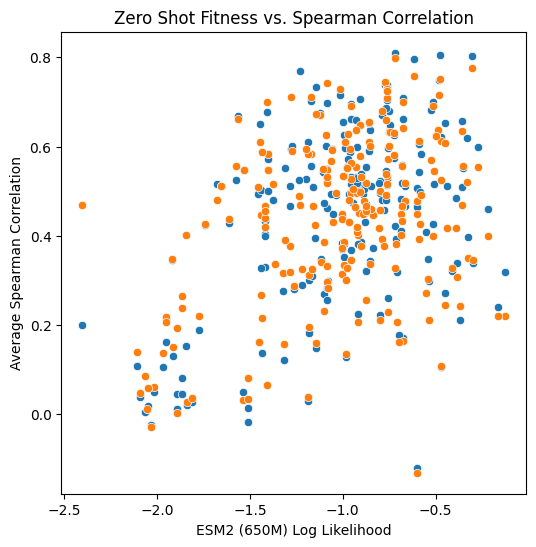

In [12]:
# plot the log likelihood vs the avg spearman correlation using only the -1th epoch
# use default matplotlib style colors
plt.figure(figsize=(6, 6))
sns.scatterplot(data=zero_shot_df[zero_shot_df['epoch'] == -1], x='ESM2 (650M) Log Likelihood', y='avg_zero_shot_fitness_spearman', color='C0')
sns.scatterplot(data=zero_shot_df[zero_shot_df['epoch'] == 0], x='ESM2 (650M) Log Likelihood', y='avg_zero_shot_fitness_spearman', color='C1')
plt.xlabel('ESM2 (650M) Log Likelihood')
plt.ylabel('Average Spearman Correlation')
plt.title('Zero Shot Fitness vs. Spearman Correlation')

In [15]:
print(len(zero_shot_df[zero_shot_df['epoch'] == -1]['avg_zero_shot_fitness_spearman']))
print(len(zero_shot_df[zero_shot_df['epoch'] == 0]['avg_zero_shot_fitness_spearman']))

217
217


ValueError: operands could not be broadcast together with shapes (216,) (217,) 

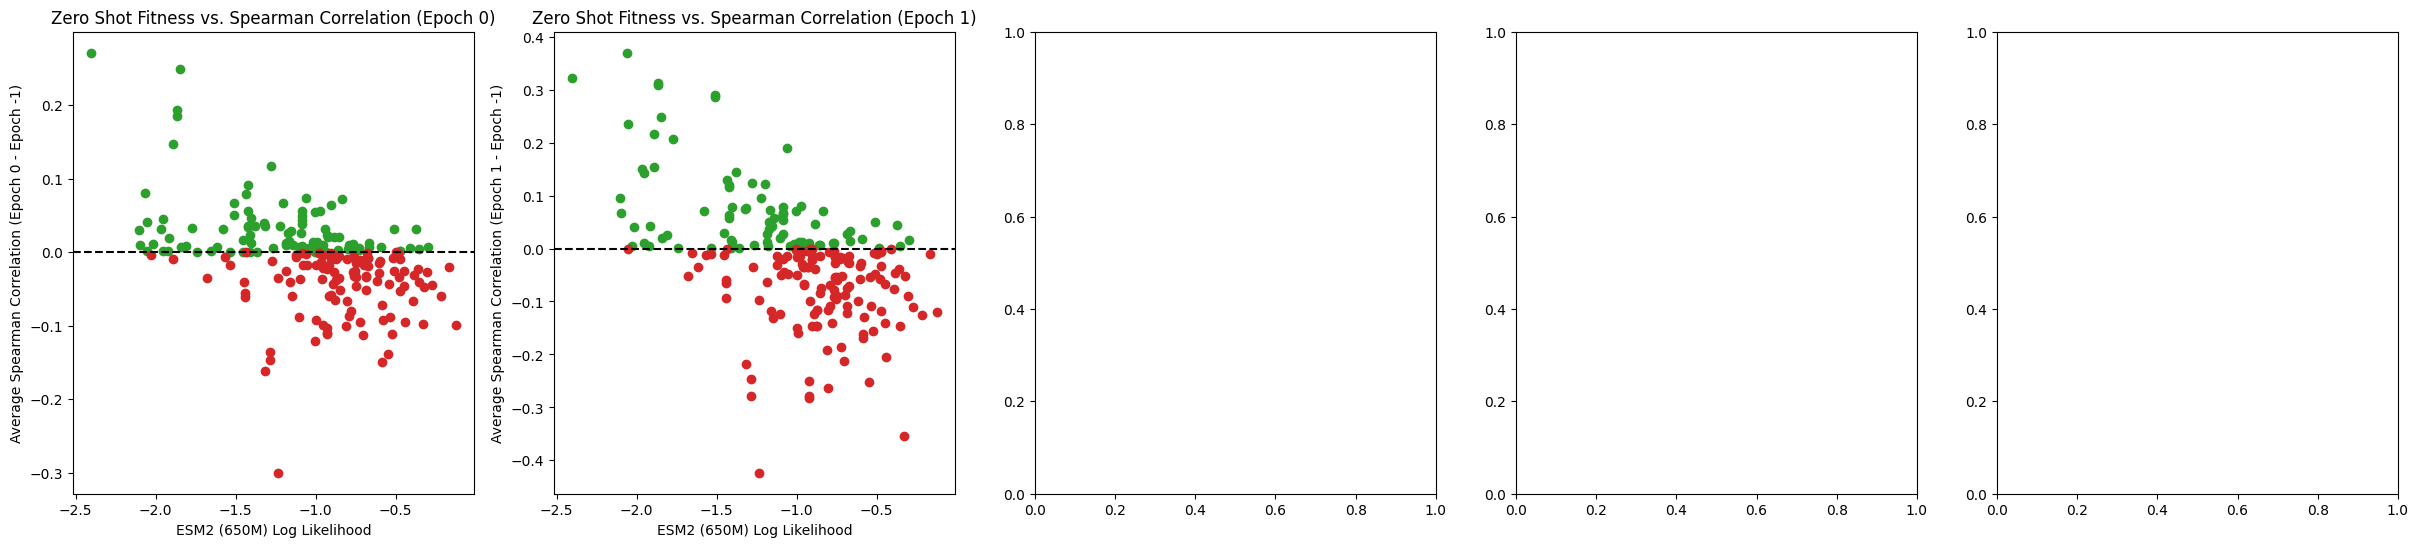

In [18]:
# plot the difference between epochs 0 through 4 and -1
fig, axs = plt.subplots(1, 5, figsize=(30, 6))
axs = axs.flatten()

for i in range(5):
    epoch = i
    epoch_data = zero_shot_df[zero_shot_df['epoch'] == epoch]['avg_zero_shot_fitness_spearman'].to_numpy()
    epoch_neg_1 = zero_shot_df[zero_shot_df['epoch'] == -1]['avg_zero_shot_fitness_spearman'].to_numpy()
    delta = epoch_data - epoch_neg_1
    
    ax = axs[i]
    ax.scatter(zero_shot_df[zero_shot_df['epoch'] == -1]['ESM2 (650M) Log Likelihood'][delta > 0], delta[delta > 0], color='C2')
    ax.scatter(zero_shot_df[zero_shot_df['epoch'] == -1]['ESM2 (650M) Log Likelihood'][delta < 0], delta[delta < 0], color='C3')
    ax.axhline(0, color='black', linestyle='--')
    ax.set_xlabel('ESM2 (650M) Log Likelihood')
    ax.set_ylabel(f'Average Spearman Correlation (Epoch {epoch} - Epoch -1)')
    ax.set_title(f'Zero Shot Fitness vs. Spearman Correlation (Epoch {epoch})')

plt.tight_layout()